# Unsupervised Clustering of Customers (using KMeans, DBSCAN and Agglomerative Clustering Algorithms) to Categorize Consumer Personas

**Problem Statement**

Grouping 500 customers across common attributes using unsupervised clustering and defining their personas to assist in better marketing each category more effectively

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df1 = pd.read_csv("Customer Data.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [6]:
df1.head()
df1.describe()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


## Scaling datasets into different configurations: Standardized, Normalized, Log, Yeo-Johnson

In [7]:
#Standardization

stdscaler= StandardScaler()
stdscaler.fit(df1)
df1_std=stdscaler.transform(df1)

StandardScaler()

In [8]:
#Normalization (MinMax)

nmlscaler= MinMaxScaler()
nmlscaler.fit(df1)

df1_nml=nmlscaler.transform(df1)

MinMaxScaler()

In [9]:
#Log Transformation

logscaler = FunctionTransformer(np.log1p, validate=True)
logscaler.fit(df1)

df1_log=logscaler.transform(df1)

FunctionTransformer(func=<ufunc 'log1p'>, validate=True)

In [10]:
#Yeo Johnson

yjscaler = PowerTransformer(method='yeo-johnson')
yjscaler.fit(df1)

df1_yj=yjscaler.transform(df1)

PowerTransformer()

## KMeans (Clustering Algorithm #1)

In [11]:
#using K-Means with an initial cluster hyperparameter of 5

k_means = KMeans(n_clusters=5, random_state=17)

In [12]:
#Trying out different scaled sets to see which one gets the best Silhouette and CH Score with KMeans

k_unscaled=k_means.fit(df1)
k_std=k_means.fit(df1_std)
k_nml=k_means.fit(df1_nml)
k_log=k_means.fit(df1_log)
k_yj=k_means.fit(df1_yj)

In [13]:
k_sh_unscaled= silhouette_score(df1, k_unscaled.labels_)
k_sh_std= silhouette_score(df1_std, k_std.labels_)
k_sh_nml= silhouette_score(df1_nml, k_nml.labels_)
k_sh_log= silhouette_score(df1_log, k_log.labels_)
k_sh_yj= silhouette_score(df1_yj, k_yj.labels_)

k_ch_unscaled= calinski_harabasz_score(df1, k_unscaled.labels_)
k_ch_std= calinski_harabasz_score(df1_std, k_std.labels_)
k_ch_nml= calinski_harabasz_score(df1_nml, k_nml.labels_)
k_ch_log= calinski_harabasz_score(df1_log, k_log.labels_)
k_ch_yj= calinski_harabasz_score(df1_yj, k_yj.labels_)



print("k_sh_unscaled ", k_sh_unscaled,'\n'
      "k_sh_std ", k_sh_std,'\n'
      "k_sh_nml ", k_sh_nml,'\n'
      "k_sh_log ", k_sh_log,'\n'
      "k_sh_yj ", k_sh_yj,'\n'
      '\n'
      "k_ch_unscaled ", k_ch_unscaled,'\n'
      "k_ch_std ", k_ch_std,'\n'
      "k_ch_nml ", k_ch_nml,'\n'
      "k_ch_log ", k_ch_log,'\n'
      "k_ch_yj ", k_ch_yj)

k_sh_unscaled  0.6617771614964709 
k_sh_std  0.8048976287755765 
k_sh_nml  0.8156911152768873 
k_sh_log  0.7617989932620409 
k_sh_yj  0.806290881060733 

k_ch_unscaled  4124.203771945923 
k_ch_std  3671.3580185176156 
k_ch_nml  3840.1054314474277 
k_ch_log  580.9045217980583 
k_ch_yj  3503.4024013985286


### Highest Silhouette and second highest CH Index score is with using Normalized (MinMax) scaled dataset

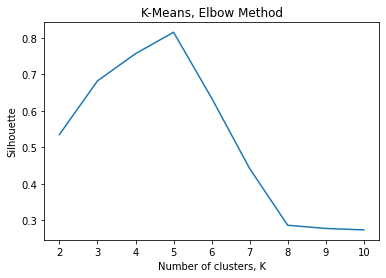

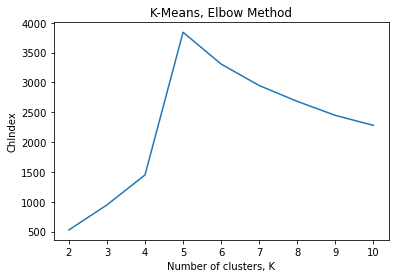

In [16]:
#Tuning the K-Means model with the Normalized scaled dataset to find the optimal number of clusters

silhouettes = {}
chindex = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=17).fit(df1_nml)
    silhouettes[k] = silhouette_score(df1_nml, kmeans.labels_, metric='euclidean')
    chindex[k]= calinski_harabasz_score(df1_nml, kmeans.labels_)
    
plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");


plt.figure();
plt.plot(list(chindex.keys()), list(chindex.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("ChIndex");


### Coincidentally the optimal number of clusters as per the Silhouette and Ch Index score is 5. We've already run the algorithm with this hyperparameter so no need to rerun the model

## Trying out feature selection to see any effect on Silhouette and CHI Score - Removing Savings

In [17]:
df_twofeat= df1.copy()

df_twofeat.drop(columns=['Savings'],inplace=True)
df_twofeat.head()

,Age,Income,SpendingScore
0,58,77769,0.791329
1,59,81799,0.791082
2,62,74751,0.702657
3,59,74373,0.765680
4,87,17760,0.348778


In [18]:
nmlscaler.fit(df_twofeat)

df_twofeat_nml=nmlscaler.transform(df_twofeat)

k_nml2=k_means.fit(df_twofeat_nml)

k_sh_nml2= silhouette_score(df_twofeat_nml, k_nml2.labels_)
k_ch_nml2= calinski_harabasz_score(df_twofeat_nml, k_nml2.labels_)

print('\n'
"k_sh_nml2", k_sh_nml2,'\n'
      "k_ch_nml2 ",k_ch_nml2,'\n')

#dropping Savings and normalizing the new dataset resulted in increase in both scores

MinMaxScaler()


k_sh_nml2 0.834342024530696 
k_ch_nml2  4603.833263305364 



In [21]:
#tabulating results

from tabulate import tabulate

results = [["K Means", "Unscaled", 0.6617771614964709,4124.203771945923],
           ["K Means", "Normalized", 0.8156911152768873, 3840.1054314474277],
           ["K Means", "Normalized | Savings Feature Dropped", 0.834342024530696,4603.833263305364]]

print(tabulate(results, headers=["Algorithm", "Model", "Silhouette Score", "CH Index"]))

Algorithm    Model                                   Silhouette Score    CH Index
-----------  ------------------------------------  ------------------  ----------
K Means      Unscaled                                        0.661777     4124.2
K Means      Normalized                                      0.815691     3840.11
K Means      Normalized | Savings Feature Dropped            0.834342     4603.83


 ## DBSCAN (Clustering Algorithm #2)

In [22]:
db = DBSCAN(eps=0.3, min_samples=3)

In [23]:
#Trying out different scaled sets to see which one gets the best Silhouette and CH Score with DBSCAN

db_unscaled=db.fit(df1)
db_std=db.fit(df1_std)
db_nml=db.fit(df1_nml)
db_log=db.fit(df1_log)
db_yj=db.fit(df1_yj)

In [24]:
db_sh_unscaled= silhouette_score(df1, db_unscaled.labels_)
db_sh_std= silhouette_score(df1_std, db_std.labels_)
db_sh_nml= silhouette_score(df1_nml, db_nml.labels_)
db_sh_log= silhouette_score(df1_log, db_log.labels_)
db_sh_yj= silhouette_score(df1_yj, db_yj.labels_)

db_ch_unscaled= calinski_harabasz_score(df1, db_unscaled.labels_)
db_ch_std= calinski_harabasz_score(df1_std, db_std.labels_)
db_ch_nml= calinski_harabasz_score(df1_nml, db_nml.labels_)
db_ch_log= calinski_harabasz_score(df1_log, db_log.labels_)
db_ch_yj= calinski_harabasz_score(df1_yj, db_yj.labels_)



print("db_sh_unscaled ", db_sh_unscaled,'\n'
      "db_sh_std ", db_sh_std,'\n'
      "db_sh_nml ", db_sh_nml,'\n'
      "db_sh_log ", db_sh_log,'\n'
      "db_sh_yj ", db_sh_yj,'\n'
      '\n'
      "db_ch_unscaled ", db_ch_unscaled,'\n'
      "db_ch_std ", db_ch_std,'\n'
      "db_ch_nml ", db_ch_nml,'\n'
      "db_ch_log ", db_ch_log,'\n'
      "db_ch_yj ", db_ch_yj)

db_sh_unscaled  0.6266219935274309 
db_sh_std  0.7604383235324144 
db_sh_nml  0.7685418499416524 
db_sh_log  0.7338329144232907 
db_sh_yj  0.7606071702268673 

db_ch_unscaled  1319.899390566878 
db_ch_std  1311.149890463303 
db_ch_nml  1325.4686724539938 
db_ch_log  313.773302101662 
db_ch_yj  1272.6610578386997


### Highest Silhouette and second highest CH Index score is with using Normalized (MinMax) scaled dataset

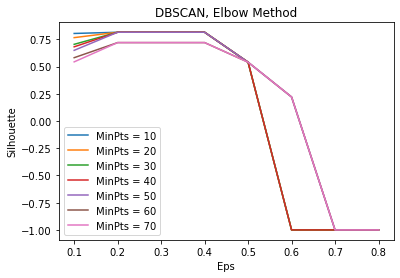

In [25]:
#Tuning the DBSCAN model with the Normalized scaled dataset to find the optimal number of eps and minss 
#based on the Silhouette Score

silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [10,20,30, 40, 50, 60, 70]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        dbscan = DBSCAN(eps=eps, min_samples=mins).fit(df1_nml)
        if len(set(dbscan.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(df1_nml, dbscan.labels_, metric='euclidean')
    

plt.figure();

for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));

plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();


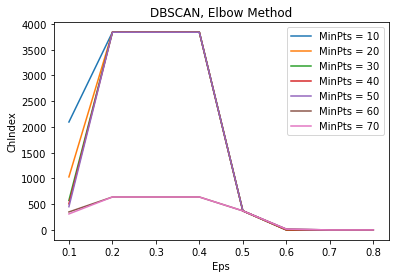

In [26]:
#Tuning the DBSCAN model with the Normalized scaled dataset to find the optimal number of eps and minss based on the CH Index

ChIndex = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [10,20,30, 40, 50, 60, 70]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        dbscan = DBSCAN(eps=eps, min_samples=mins).fit(df1_nml)
        if len(set(dbscan.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = calinski_harabasz_score(df1_nml, dbscan.labels_)
    

plt.figure();

for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));

plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("ChIndex");
plt.legend();

In [27]:
#Reruning the DBSCAN model with optimal hyperparameters but both the scores did not increase

db_tuned = DBSCAN(eps=0.3, min_samples=50)
db_tuned.fit(df_twofeat_nml)
db_tuned_sh_nml2= silhouette_score(df_twofeat_nml, db_tuned.labels_)
db_tuned_ch_nml2= calinski_harabasz_score(df_twofeat_nml, db_tuned.labels_)


print('\n'
"db_tuned_sh_nml2 ", db_tuned_sh_nml2,'\n'
      "db_tuned_ch_nml2 ", db_tuned_ch_nml2)

DBSCAN(eps=0.3, min_samples=50)


db_tuned_sh_nml2  0.834342024530696 
db_tuned_ch_nml2  4603.833263305364


In [28]:
#Trying a couple of different distance metrics - Chebyshev and Manhattan

db_tuned = DBSCAN(eps=0.3, min_samples=50, metric = 'chebyshev')

db_tuned.fit(df_twofeat_nml)
db_tuned_sh_nml3= silhouette_score(df_twofeat_nml, db_tuned.labels_)
db_tuned_ch_nml3= calinski_harabasz_score(df_twofeat_nml, db_tuned.labels_)


print('\n'
"db_tuned_sh_nml3 ", db_tuned_sh_nml3,'\n'
      "db_tuned_ch_nml3 ", db_tuned_ch_nml3)

db_tuned = DBSCAN(eps=0.3, min_samples=50, metric = 'manhattan')

db_tuned.fit(df_twofeat_nml)
db_tuned_sh_nml4= silhouette_score(df_twofeat_nml, db_tuned.labels_)
db_tuned_ch_nml4= calinski_harabasz_score(df_twofeat_nml, db_tuned.labels_)


print('\n'
"db_tuned_sh_nml4 ", db_tuned_sh_nml4,'\n'
      "db_tuned_ch_nml4 ", db_tuned_ch_nml4)

DBSCAN(eps=0.3, metric='chebyshev', min_samples=50)


db_tuned_sh_nml3  0.31936881000738915 
db_tuned_ch_nml3  120.14357052079788


DBSCAN(eps=0.3, metric='manhattan', min_samples=50)


db_tuned_sh_nml4  0.834342024530696 
db_tuned_ch_nml4  4603.833263305364


### Chebyshev metric led to a significant decrease in the scores but the manhattan metric yielded the same scores as with euclidean

In [29]:
results = [["K Means", "Unscaled", 0.6617771614964709,4124.203771945923],
           ["K Means", "Normalized", 0.8156911152768873, 3840.1054314474277],
           ["K Means", "Normalized | Hyperparam Tuned | Savings Feature Dropped", 0.834342024530696,4603.833263305364],
           '\n',
           ["DBSCAN", "Unscaled", 0.6266219935274309, 1319.899390566878],
           ["DBSCAN","Normalized",0.7685418499416524, 1325.4686724539938],
           ["DBSCAN","Normalized | Hyperparam Tuned",0.8156911152768873,3840.1054314474286],
           ["DBSCAN","Normalized | Hyperparam Tuned | Savings Feature Dropped",0.834342024530696,4603.833263305364],
           ["DBSCAN","Normalized | Hyperparam Tuned | Savings Feature Dropped | Chebyshev Distance",0.31936881000738915, 120.14357052079788],
           ["DBSCAN","Normalized | Hyperparam Tuned | Savings Feature Dropped | Manhattan Distance",0.834342024530696,4603.833263305364]
           ]

print(tabulate(results, headers=["Algorithm", "Model", "Silhouette Score", "CH Index"]))

Algorithm    Model                                                                           Silhouette Score    CH Index
-----------  ----------------------------------------------------------------------------  ------------------  ----------
K Means      Unscaled                                                                                0.661777    4124.2
K Means      Normalized                                                                              0.815691    3840.11
K Means      Normalized | Hyperparam Tuned | Savings Feature Dropped                                 0.834342    4603.83

DBSCAN       Unscaled                                                                                0.626622    1319.9
DBSCAN       Normalized                                                                              0.768542    1325.47
DBSCAN       Normalized | Hyperparam Tuned                                                           0.815691    3840.11
DBSCAN       Normalized | Hyper

## Agglomerative Hierarchial (Clustering Algorithm #3)

In [31]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [32]:
#Trying out different scaled sets to see which one gets the best Silhouette and CH Score with Hierarchial

agg_unscaled=agg.fit(df1)
agg_std=agg.fit(df1_std)
agg_nml=agg.fit(df1_nml)
agg_log=agg.fit(df1_log)
agg_yj=agg.fit(df1_yj)

In [33]:
agg_sh_unscaled= silhouette_score(df1, agg_unscaled.labels_)
agg_sh_std= silhouette_score(df1_std, agg_std.labels_)
agg_sh_nml= silhouette_score(df1_nml, agg_nml.labels_)
agg_sh_log= silhouette_score(df1_log, agg_log.labels_)
agg_sh_yj= silhouette_score(df1_yj, agg_yj.labels_)

agg_ch_unscaled= calinski_harabasz_score(df1, agg_unscaled.labels_)
agg_ch_std= calinski_harabasz_score(df1_std, agg_std.labels_)
agg_ch_nml= calinski_harabasz_score(df1_nml, agg_nml.labels_)
agg_ch_log= calinski_harabasz_score(df1_log, agg_log.labels_)
agg_ch_yj= calinski_harabasz_score(df1_yj, agg_yj.labels_)

print("agg_sh_unscaled ", agg_sh_unscaled,'\n'
      "agg_sh_std ", agg_sh_std,'\n'
      "agg_sh_nml ", agg_sh_nml,'\n'
      "agg_sh_log ", agg_sh_log,'\n'
      "agg_sh_yj ", agg_sh_yj,'\n'
      '\n'
      "agg_ch_unscaled ", agg_ch_unscaled,'\n'
      "agg_ch_std ", agg_ch_std,'\n'
      "agg_ch_nml ", agg_ch_nml,'\n'
      "agg_ch_log ", agg_ch_log,'\n'
      "agg_ch_yj ", agg_ch_yj)


agg_sh_unscaled  0.6617771614964709 
agg_sh_std  0.8048976287755765 
agg_sh_nml  0.8156911152768873 
agg_sh_log  0.7617989932620409 
agg_sh_yj  0.806290881060733 

agg_ch_unscaled  4124.203771945923 
agg_ch_std  3671.3580185176156 
agg_ch_nml  3840.1054314474277 
agg_ch_log  580.9045217980582 
agg_ch_yj  3503.4024013985286


### Highest Silhouette and second highest CH Index score is with using Normalized (MinMax) scaled dataset

In [34]:
#Trying out model with MinMax reduced dataset (Savings feature dropped)

agg.fit(df_twofeat_nml)
agg_sh_nml2= silhouette_score(df_twofeat_nml, agg.labels_)
agg_ch_nml2= calinski_harabasz_score(df_twofeat_nml, agg.labels_)


print('\n'
"agg_sh_nml2 ", agg_sh_nml2,'\n'
      "agg_ch_nml2 ", agg_ch_nml2)

AgglomerativeClustering(n_clusters=5)


agg_sh_nml2  0.834342024530696 
agg_ch_nml2  4603.833263305364


In [38]:
# Trying a couple of different distance and linkage combinations to check any movements in the scores
#Cosine/Complete & Manhattan/Average

agg = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='complete')

agg.fit(df_twofeat_nml)
agg_sh_nml3= silhouette_score(df_twofeat_nml, agg.labels_)
agg_ch_nml3= calinski_harabasz_score(df_twofeat_nml, agg.labels_)


print('\n'
"agg_sh_nml3 ", agg_sh_nml3,'\n'
      "agg_ch_nml3 ", agg_ch_nml3)

agg = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')

agg.fit(df_twofeat_nml)
agg_sh_nml4= silhouette_score(df_twofeat_nml, agg.labels_)
agg_ch_nml4= calinski_harabasz_score(df_twofeat_nml, agg.labels_)


print('\n'
"agg_sh_nml4 ", agg_sh_nml4,'\n'
      "agg_ch_nml4 ", agg_ch_nml4)

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=5)


agg_sh_nml3  0.834342024530696 
agg_ch_nml3  4603.833263305364


AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=5)


agg_sh_nml4  0.834342024530696 
agg_ch_nml4  4603.833263305364


### All configurations are yielding the same scores which can potentially mean that the model has already found the best clusters

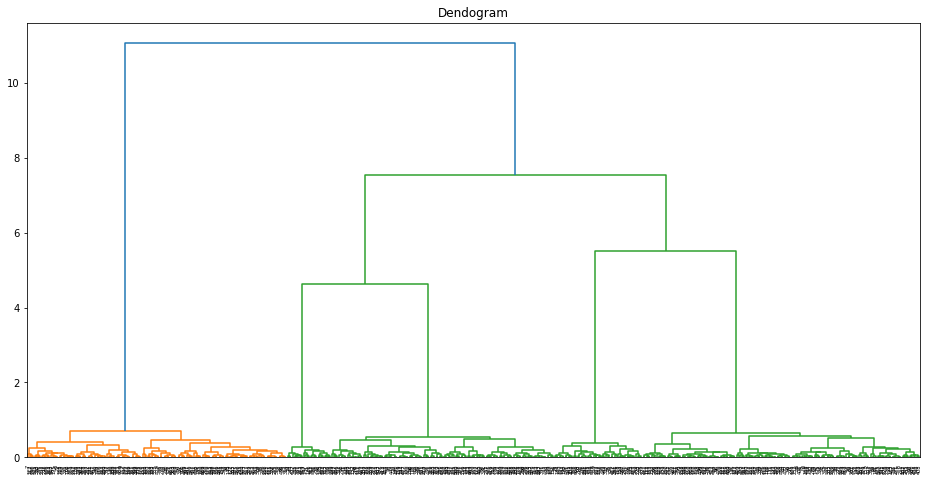

In [39]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(df_twofeat_nml, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

## Model Comparison

In [41]:
results = [["K Means", "Unscaled", 0.6617771614964709,4124.203771945923],
           ["K Means", "Normalized", 0.8156911152768873, 3840.1054314474277],
           ["K Means", "Normalized | Hyperparam Tuned | Savings Feature Dropped", 0.834342024530696,4603.833263305364],
           '\n',
           ["DBSCAN", "Unscaled", 0.6266219935274309, 1319.899390566878],
           ["DBSCAN","Normalized",0.7685418499416524, 1325.4686724539938],
           ["DBSCAN","Normalized | Hyperparam Tuned",0.8156911152768873,3840.1054314474286],
           ["DBSCAN","Normalized | Hyperparam Tuned | Savings Feature Dropped",0.834342024530696,4603.833263305364],
           ["DBSCAN","Normalized | Hyperparam Tuned | Savings Feature Dropped | Chebyshev Distance",0.31936881000738915, 120.14357052079788],
           ["DBSCAN","Normalized | Hyperparam Tuned | Savings Feature Dropped | Manhattan Distance",0.834342024530696,4603.833263305364],
            '\n',
           ["Hierarchial", "Unscaled", 0.6617771614964709,4124.203771945923],
           ["Hierarchial", "Normalized",0.8156911152768873,3840.1054314474277],
           ["Hierarchial", "Normalized | Savings Feature Dropped",0.834342024530696,4603.833263305364],
           ["Hierarchial", "Normalized | Savings Feature Dropped | Cosine Distance Complete Linkage",0.834342024530696,4603.833263305364],
           ["Hierarchial", "Normalized | Savings Feature Dropped | Manhattan Distance Average Linkage",0.834342024530696,4603.833263305364]
           ]

print(tabulate(results, headers=["Algorithm", "Model", "Silhouette Score", "CH Index"]))

Algorithm    Model                                                                           Silhouette Score    CH Index
-----------  ----------------------------------------------------------------------------  ------------------  ----------
K Means      Unscaled                                                                                0.661777    4124.2
K Means      Normalized                                                                              0.815691    3840.11
K Means      Normalized | Hyperparam Tuned | Savings Feature Dropped                                 0.834342    4603.83

DBSCAN       Unscaled                                                                                0.626622    1319.9
DBSCAN       Normalized                                                                              0.768542    1325.47
DBSCAN       Normalized | Hyperparam Tuned                                                           0.815691    3840.11
DBSCAN       Normalized | Hyper

Based on the different iteration runs of each of the three algorithms, we can conclude that given the data and the features, we can find the best clusters by personas by:

i) normalising the data 

ii) dropping the Savings feature 

iii) hyperparameter tuning the models

**K-Means** is the simplest to use. It also is theoretically very quick in fitting the data and it is the easiest to use as well.

**DBSCAN** also yielded quick results and helped in proving that there weren't outliers in the dataset as it found the same clusters as K_Means. It is however difficult to tune as compared to K-Means.

**Agglomerative Hierarchial** provides visual aid in the shape of the dendogram and allows the user of the analysis to group the data into the number of clusters required by running a horizontal line across the dendogram and adjusting it vertically. It is also very flexible in circumscribing clusters. It is however not recommended with larger datasets due to comparitively lower training speed.

In view of the fact that each algorithm was able to reach the same best cluster, we can select and move forward with the Hierarchial model with Manhattan Distance and Average Linkage (the last model in the table shown above)

#### The best clusters has a Silhouette Score of 0.834342 and a Calinski Harabasz Index of 4603.83.

## Creating Personas

### Statistical Description of Clusters or Personas

In [42]:
#Adding Cluster IDs to the dataset

K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

df1['Cluster ID'] = labels
df1.head(9)

,Age,Income,SpendingScore,Savings,Cluster ID
0,58,77769,0.791329,6559.829923,5
1,59,81799,0.791082,5417.661426,5
2,62,74751,0.702657,9258.992965,5
3,59,74373,0.765680,7346.334504,5
4,87,17760,0.348778,16869.507130,1
5,29,131578,0.847034,3535.514352,4
6,54,76500,0.785198,6878.884249,5
7,87,42592,0.355290,18086.287158,1
8,83,34384,0.324719,14783.379086,1


In [43]:
cl_group = df1.groupby(['Cluster ID']).agg([np.mean,len])
cl_group

Age              Income      SpendingScore       \
                 mean  len           mean  len          mean  len   
Cluster ID                                                          
1           87.775510  147   27866.102041  147      0.328800  147   
2           86.000000   25  119944.040000   25      0.068378   25   
3           32.777778  126  105265.809524  126      0.309926  126   
4           24.180000   50  128029.120000   50      0.896892   50   
5           59.955414  157   72448.063694  157      0.771518  157   

                 Savings       
                    mean  len  
Cluster ID                     
1           16659.261445  147  
2           14808.683793   25  
3           14962.778066  126  
4            4087.520309   50  
5            6889.972190  157

#### Snakeplot

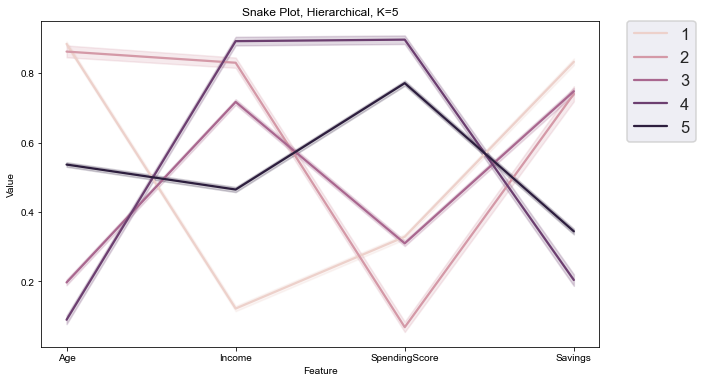

In [44]:
col_names= ["Age","Income","SpendingScore", "Savings"]

X_df = pd.DataFrame(df1_nml, columns=col_names)
X_df['Cluster'] = labels
X_df.head()

X_df_melt = pd.melt(X_df,
    id_vars=['Cluster'],
    value_vars=['Age','Income','SpendingScore', 'Savings'],
    var_name='Feature',
    value_name='Value')

plt.figure(figsize=(10,6))
plt.title('Snake Plot, Hierarchical, K=5');
sns.set(style="darkgrid")
sns.set_context("talk")
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=X_df_melt, legend="full");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Exemplars

In [45]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, df1_nml.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = df1_nml[labels==label].mean(axis=0)
means

array([[0.88, 0.12, 0.33, 0.83],
       [0.86, 0.83, 0.07, 0.74],
       [0.2 , 0.72, 0.31, 0.75],
       [0.09, 0.89, 0.9 , 0.2 ],
       [0.54, 0.46, 0.77, 0.34]])

In [46]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= df1_nml
    exemplar_idx = distance.cdist([means[i]], df1_nml).argmin()
   
    print('\nCluster {}:'.format(label))
   
    display(df1.iloc[[exemplar_idx]])


Cluster 1:


,Age,Income,SpendingScore,Savings,Cluster ID
335,89,26940,0.326005,16555.159377,1



Cluster 2:


,Age,Income,SpendingScore,Savings,Cluster ID
155,86,115689,0.057843,14803.153273,2



Cluster 3:


,Age,Income,SpendingScore,Savings,Cluster ID
405,34,103204,0.301087,15149.810421,3



Cluster 4:


,Age,Income,SpendingScore,Savings,Cluster ID
95,25,130934,0.913766,3942.389134,4



Cluster 5:


,Age,Income,SpendingScore,Savings,Cluster ID
467,61,72027,0.762325,6926.123598,5


### Defining the Personas

**Cluster 1: Retired Sustainers**

*Age: High; Income: Low; Spending Score: Medium; Savings: High*

This persona includes 147 customers.

These customers are most probably retired, given their high age and low income. They have high savings in their banks on which they are sustaining themselves. Due to their little or no income and their limited funds, they maintain a nominal spending score purchasing only necessary items.

These customers will not be very keen or frequent in buying diamonds.

**Cluster 2: Wealthy Seniors**

*Age: High; Income: High; Spending Score: Low; Savings: High*

This persona includes 25 customers.

These customers are aged individuals but ones with high income and high savings. Despite their wealth, they have a very low spending score (the lowest average of all five clusters). One plausible reason might be that their children are bearing all their living expenses.

These customers can prove to be a good target as they have a lot of financial resources but are not utlizing them. They can therefore easily afford diamonds.

**Cluster 3: Sensible Adults**

*Age: Medium; Income: High; Spending Score: Medium; Savings: High*

This persona includes 126 customers.

These customers are middle aged individuals with good income, a fair spending score and a high accumalation of savings. These can be assumed to be young growing families, incuring daily living expenditures while saving money for their children's future expenses such as college fees.

These customers while can afford to buy diamonds, look to be very rational and might not indulge in impulse buying. They can however be potentially convinced with the right marketing.

**Cluster 4: Earning to Spend**

*Age: Low; Income: High; Spending Score: High; Savings: Low*

This persona includes 50 customers.

These customers are energetic young adults who are making very good money and are spending it almost completely as well, leading to low savings.

These customers can be the gold target personas as they enjoy buying and can afford to do so as well. Given that they like what they see, there is a high probability they'll take your products off the shelf.

**Cluster 5: Aging Spendthrifts**

*Age: High; Income: Medium; Spending Score: High; Savings: Medium*

This persona includes 157 customers.

These customers are individuals who are nearing retirement with a modest income and low savings. However, they seem to exhibit irrational spending patterns, or in other words, they tend to carelessly buy more than they should or can.

These customers can prove to be a good target persona but they might not last very long. Assuming they retire in a few years, they might not have good income and they do not have an adequate amount of saving to show for. In that case, they will not be able to afford diamonds or maintain their purchasing style in the near future.